In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from matplotlib import style

In [6]:
train_df=pd.read_csv(r"C:\Users\hp\Downloads\train (1).csv")

In [7]:
test_df=pd.read_csv(r"C:\Users\hp\Downloads\test (1).csv")

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
total=train_df.isnull().sum().sort_values(ascending=False)

In [11]:
percent=train_df.isnull().sum()/train_df.isnull().count() * 100

In [12]:
percent

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [14]:
missing_tb=pd.concat([total,percent],axis=1,keys=['total','%'])

In [15]:
missing_tb

,total,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [16]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_2520\3238873995.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=30,label=surv,ax=axes[0],kde=False)
C:\Users\hp\AppData\Local\Temp\ipykernel_2520\3238873995.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sn

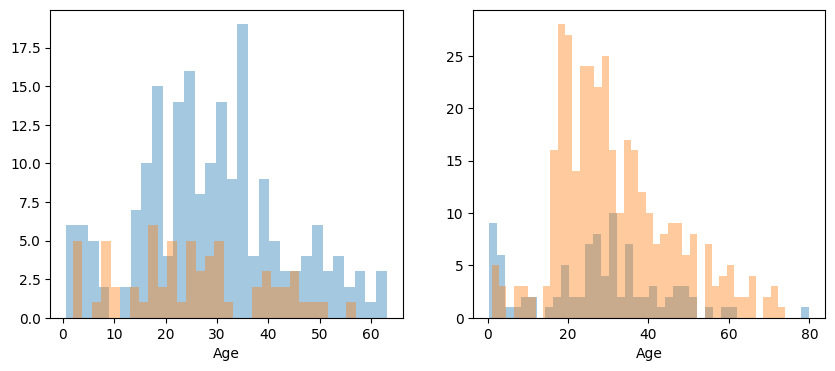

In [17]:
surv='survived'
not_surv='not_survived'

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
men=train_df[train_df['Sex']=='male']
women=train_df[train_df['Sex']=='female']

ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=30,label=surv,ax=axes[0],kde=False)

ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=30,label=surv,ax=axes[0],kde=False)



ax=sns.distplot(men[men['Survived']==1].Age.dropna(),bins=40,label=surv,ax=axes[1],kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40,label=surv,ax=axes[1],kde=False)


In [18]:
train_df.shape

(891, 12)

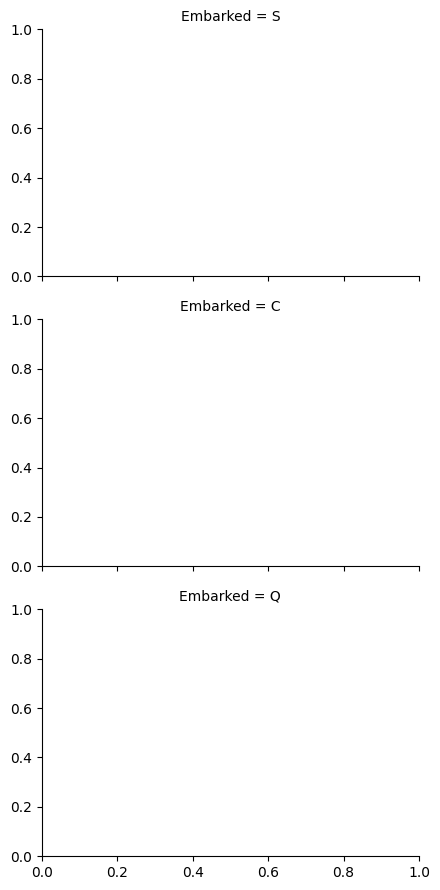

In [19]:
g=sns.FacetGrid(train_df, row='Embarked',aspect=1.5)





<Axes: xlabel='Pclass', ylabel='Survived'>

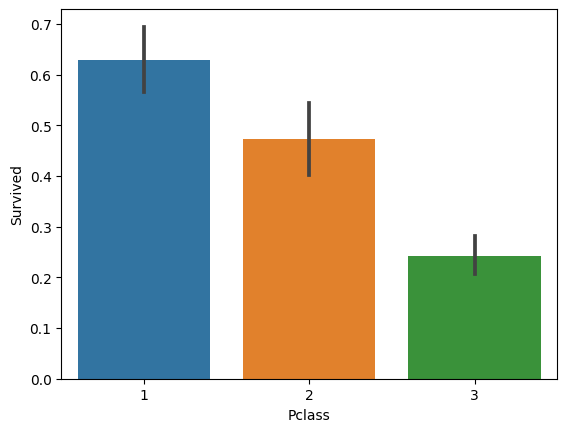

In [20]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

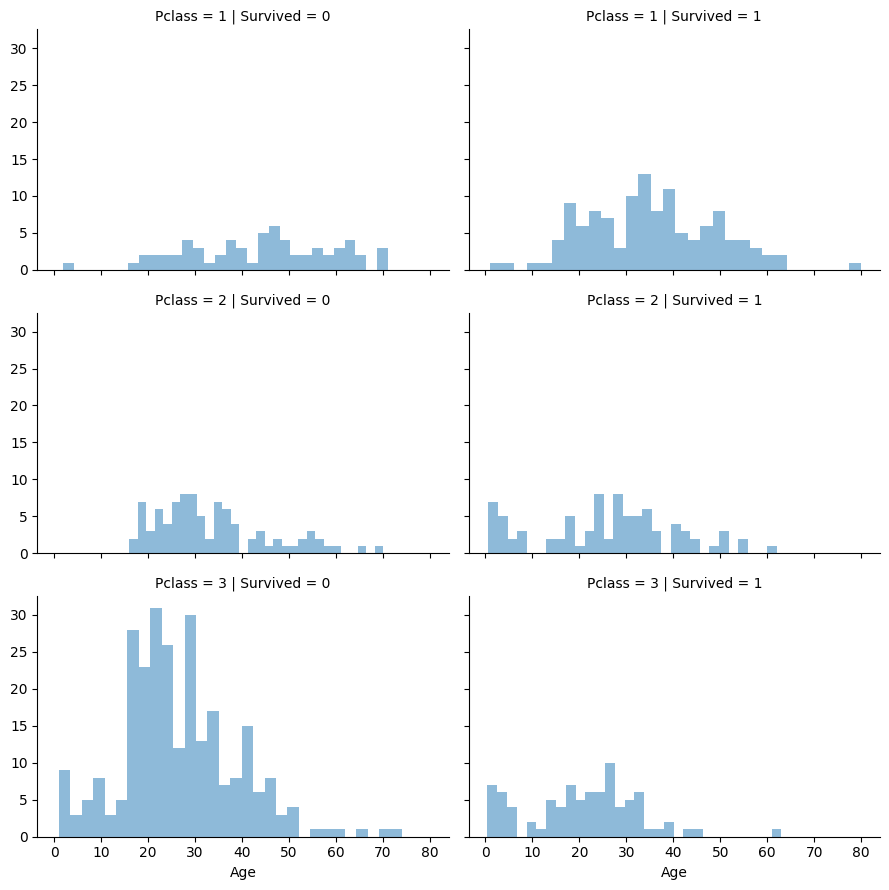

In [21]:
g=sns.FacetGrid(train_df, row='Pclass', col='Survived',   aspect=1.5)
g.map(plt.hist, 'Age', bins=30,alpha=0.5)

In [22]:
data=[train_df,test_df]

In [23]:
data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [24]:
for dataset in data:
    dataset['relatives']=dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']>0 ,'not_alone']=0

    dataset.loc[dataset['relatives']==0, 'not_alone']=1






In [25]:
dataset['not_alone']=dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1.0    537
0.0    354
Name: not_alone, dtype: int64

In [26]:
train_df=train_df.drop(['PassengerId'], axis=1)

In [27]:
test_df=test_df.drop(['PassengerId'], axis=1)

In [28]:
train_df=train_df.drop(['Cabin'], axis=1)

In [29]:
test_df=test_df.drop(['Cabin'], axis=1)

In [30]:
data=[train_df,test_df]

for dataset in data:
    mean_train=train_df['Age'].mean()
    stdv_train=train_df['Age'].std()
    null_count=dataset['Age'].isnull().sum()

    rand_age=np.random.randint(mean_train-stdv_train,mean_train+stdv_train,size=null_count)

    age_slice=dataset['Age'].copy()

    age_slice[np.isnan(age_slice)]=rand_age

    dataset['Age']=age_slice




In [31]:
rand_age

array([20, 42, 35, 21, 17, 35, 26, 28, 21, 33, 42, 25, 31, 34, 40, 39, 28,
       22, 19, 36, 26, 40, 21, 30, 24, 20, 21, 39, 17, 29, 19, 39, 21, 24,
       37, 38, 24, 35, 17, 25, 29, 21, 23, 17, 42, 38, 28, 17, 22, 42, 19,
       17, 23, 37, 22, 18, 42, 36, 21, 38, 36, 36, 28, 34, 41, 18, 42, 36,
       30, 21, 26, 16, 27, 27, 29, 25, 22, 16, 38, 28, 32, 35, 39, 21, 16,
       19])

In [32]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1.0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,31.0,1,2,W./C. 6607,23.4500,S,3,0.0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1.0


In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   889 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Name       418 non-null    object 
 2   Sex        418 non-null    object 
 3   Age        418 non-null    float64
 4   SibSp      418 non-null    int64  
 5   Parch      418 non-null    int64  
 6   Ticket     418 non-null    object 
 7   Fare       417 non-null    float64
 8   Embarked   418 non-null    object 
 9   relatives  418 non-null    int64  
 10  not_alone  418 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 34.4+ KB


In [35]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [36]:
common='S'
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna(common)

In [37]:
test_df['Fare']=test_df['Fare'].fillna(35.62)

In [38]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2,0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,21.0,0,0,A.5. 3236,8.0500,S,0,1
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,1
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1
416,3,"Ware, Mr. Frederick",male,16.0,0,0,359309,8.0500,S,0,1


In [39]:
for dataset in data:
    dataset['Fare']=dataset['Fare'].astype(int)
    dataset['Age']=dataset['Age'].astype(int)
    


In [40]:
gender={'male':0,'female':1}
for dataset in data:
    dataset['Sex']=dataset['Sex'].map(gender)


In [41]:
emb={'S':0,'C':1,'Q':2}
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(emb)


In [42]:
train_df=train_df.drop(['Ticket','Name'],axis=1)

In [43]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,0,22,1,0,7,0,1,0.0
1,1,1,1,38,1,0,71,1,1,0.0
2,1,3,1,26,0,0,7,0,0,1.0
3,1,1,1,35,1,0,53,0,1,0.0
4,0,3,0,35,0,0,8,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,0,1.0
887,1,1,1,19,0,0,30,0,0,1.0
888,0,3,1,31,1,2,23,0,3,0.0
889,1,1,0,26,0,0,30,1,0,1.0


In [54]:
test_df.isnull().sum()

Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
relatives    0
not_alone    0
dtype: int64

In [53]:
train_df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
relatives    0
not_alone    0
dtype: int64

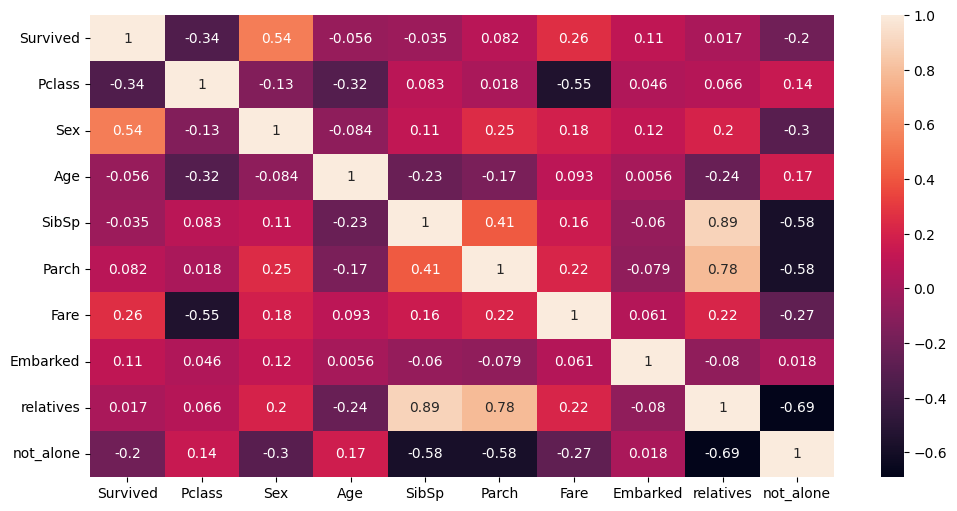

In [44]:
plt.figure(figsize = (12, 6))
sns.heatmap(train_df.corr(), annot = True)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2520\3345841647.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_df.corr(), annot = True)


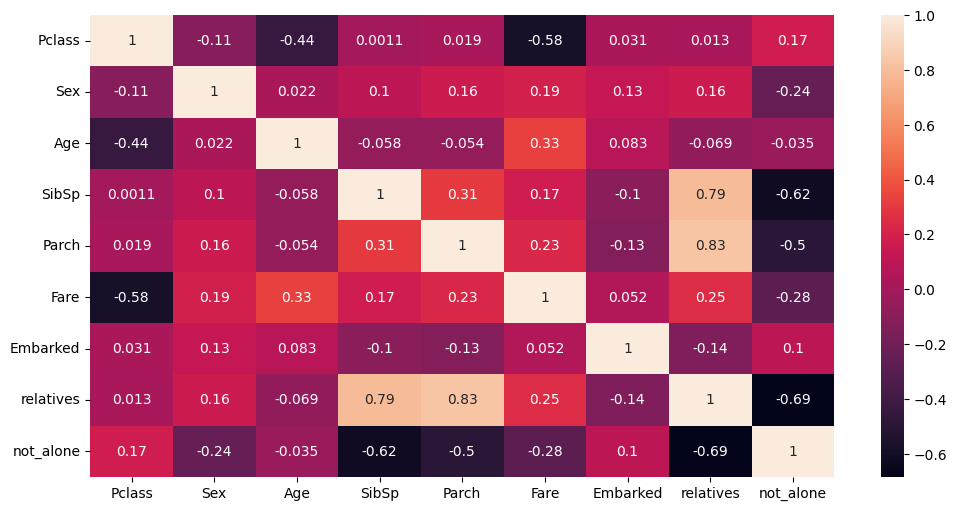

In [45]:
plt.figure(figsize = (12, 6))
sns.heatmap(test_df.corr(), annot = True)
plt.show()

In [52]:
import re
deck={"A":1, "B":2, "C":3, "C":4,"E":5, "F":6, "G":7, "U":8}
data=[train_df, test_df]

for dataset in data:
    dataset['Cabin']= dataset['Cabin'].fillna("U0")
    dataset['Deck']= dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck']= dataset['Deck'].map(deck)
    dataset['Deck']=dataset['Deck'].fillna(0)
    dataset['Deck']=dataset['Deck'].astype(int)

train_df=train_df.drop(['Cabin'],axis=1)
test_df=test_df.drop(['Cabin'],axis=1)



KeyError: 'Cabin'

In [56]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,0,22,1,0,7,0,1,0.0
1,1,1,1,38,1,0,71,1,1,0.0
2,1,3,1,26,0,0,7,0,0,1.0
3,1,1,1,35,1,0,53,0,1,0.0
4,0,3,0,35,0,0,8,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,0,1.0
887,1,1,1,19,0,0,30,0,0,1.0
888,0,3,1,31,1,2,23,0,3,0.0
889,1,1,0,26,0,0,30,1,0,1.0


In [55]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,3,"Kelly, Mr. James",0,34,0,0,330911,7,2,0,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7,0,1,0
2,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9,2,0,1
3,3,"Wirz, Mr. Albert",0,27,0,0,315154,8,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",0,21,0,0,A.5. 3236,8,0,0,1
414,1,"Oliva y Ocana, Dona. Fermina",1,39,0,0,PC 17758,108,1,0,1
415,3,"Saether, Mr. Simon Sivertsen",0,38,0,0,SOTON/O.Q. 3101262,7,0,0,1
416,3,"Ware, Mr. Frederick",0,16,0,0,359309,8,0,0,1


In [57]:
dataset=[train_df,test_df]
for dataset in data:
    dataset['Age_Class']=dataset['Age']* dataset['Pclass']

In [60]:
test_df.drop(['Name','Ticket'], axis=1,inplace=True)

In [61]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Age_Class
0,0,3,0,22,1,0,7,0,1,0.0,66
1,1,1,1,38,1,0,71,1,1,0.0,38
2,1,3,1,26,0,0,7,0,0,1.0,78
3,1,1,1,35,1,0,53,0,1,0.0,35
4,0,3,0,35,0,0,8,0,0,1.0,105
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,0,1.0,54
887,1,1,1,19,0,0,30,0,0,1.0,19
888,0,3,1,31,1,2,23,0,3,0.0,93
889,1,1,0,26,0,0,30,1,0,1.0,26


In [63]:
X_train=train_df.drop("Survived", axis=1)
Y_train=train_df["Survived"]
X_test=test_df.copy()

In [64]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Age_Class
0,3,0,22,1,0,7,0,1,0.0,66
1,1,1,38,1,0,71,1,1,0.0,38
2,3,1,26,0,0,7,0,0,1.0,78
3,1,1,35,1,0,53,0,1,0.0,35
4,3,0,35,0,0,8,0,0,1.0,105
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27,0,0,13,0,0,1.0,54
887,1,1,19,0,0,30,0,0,1.0,19
888,3,1,31,1,2,23,0,3,0.0,93
889,1,0,26,0,0,30,1,0,1.0,26


In [65]:
logreg=LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred=logreg.predict(X_test)

acc_log=round(logreg.score(X_train,Y_train) * 100,2)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Age_Class
0,3,0,34,0,0,7,2,0,1,102
1,3,1,47,1,0,7,0,1,0,141
2,2,0,62,0,0,9,2,0,1,124
3,3,0,27,0,0,8,0,0,1,81
4,3,1,22,1,1,12,0,2,0,66
...,...,...,...,...,...,...,...,...,...,...
413,3,0,21,0,0,8,0,0,1,63
414,1,1,39,0,0,108,1,0,1,39
415,3,0,38,0,0,7,0,0,1,114
416,3,0,16,0,0,8,0,0,1,48


In [67]:
X_train=train_df.drop('Survived',axis=1)

In [68]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Age_Class
0,3,0,22,1,0,7,0,1,0.0,66
1,1,1,38,1,0,71,1,1,0.0,38
2,3,1,26,0,0,7,0,0,1.0,78
3,1,1,35,1,0,53,0,1,0.0,35
4,3,0,35,0,0,8,0,0,1.0,105
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27,0,0,13,0,0,1.0,54
887,1,1,19,0,0,30,0,0,1.0,19
888,3,1,31,1,2,23,0,3,0.0,93
889,1,0,26,0,0,30,1,0,1.0,26


In [69]:
Y_train=train_df['Survived']

In [70]:
X_test=test_df.copy()

In [71]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Age_Class
0,3,0,34,0,0,7,2,0,1,102
1,3,1,47,1,0,7,0,1,0,141
2,2,0,62,0,0,9,2,0,1,124
3,3,0,27,0,0,8,0,0,1,81
4,3,1,22,1,1,12,0,2,0,66
...,...,...,...,...,...,...,...,...,...,...
413,3,0,21,0,0,8,0,0,1,63
414,1,1,39,0,0,108,1,0,1,39
415,3,0,38,0,0,7,0,0,1,114
416,3,0,16,0,0,8,0,0,1,48


In [72]:
log=LogisticRegression()


In [73]:
log.fit(X_train,Y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
Y_pred=log.predict(X_test)

In [75]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
acc_log=round(log.score(X_train,Y_train)*100,2)

In [77]:
acc_log

80.13